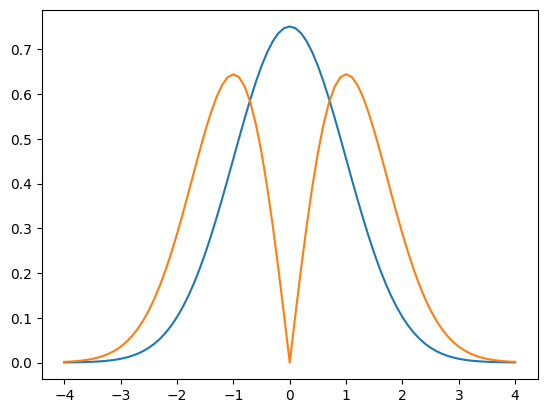

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
# Part A
L = 4
K = 1
xspan = np.arange(-L,L+0.1,0.1)
eigenfunctions = []
eigenvalues = []
epsilon0= 0.1
col = ['r', 'b', 'g', 'c', 'm']
def bvp_rhs(x, y, epsilon):
    return [y[1], (K*x**2 - epsilon) * y[0]]

for n in range(1,6):
    epsilon = epsilon0
    depsilon = 0.2
    for j in range(1000):
        y0 = [1, np.sqrt(K*L**2-epsilon)*1]
        sol = solve_ivp(bvp_rhs,[xspan[0],xspan[-1]], y0, args=(epsilon,),t_eval = xspan)
        sol_check = sol.y[1,-1]+np.sqrt(K*L**2-epsilon)*sol.y[0,-1]
        if abs(sol_check) < 1e-6:
            break
        if (-1)**(n+1)* sol_check > 0:
                epsilon += depsilon
        else:
                epsilon -= depsilon
                depsilon /= 2
    eigenvalues.append(epsilon)
    epsilon0 = epsilon + 0.1
    norm = np.trapz(sol.y[0]**2, xspan)
    normalized_phi = sol.y[0] / np.sqrt(norm)
    eigenfunctions.append(np.abs(normalized_phi))

A1 = np.column_stack(eigenfunctions)
A2 = np.array(eigenvalues)
plt.plot(xspan, A1[:,0])
plt.plot(xspan, A1[:,1])

First five eigenvalues: [0.99937352+0.j 2.996839  +0.j 4.99140656+0.j 6.98038865+0.j
 8.95060003+0.j]
First five eigenfunctions: [[5.25330699e-04+0.j 2.98456752e-03+0.j 1.16813848e-02+0.j
  3.63684946e-02+0.j 9.51957970e-02+0.j]
 [5.65512105e-04+0.j 3.17867592e-03+0.j 1.23103575e-02+0.j
  3.79292078e-02+0.j 9.82713969e-02+0.j]
 [6.86056325e-04+0.j 3.76100113e-03+0.j 1.41972756e-02+0.j
  4.26113473e-02+0.j 1.07498197e-01+0.j]
 [8.98810812e-04+0.j 4.77370376e-03+0.j 1.74256365e-02+0.j
  5.04721278e-02+0.j 1.22626002e-01+0.j]
 [1.22563002e-03+0.j 6.29686622e-03+0.j 2.21697827e-02+0.j
  6.17193919e-02+0.j 1.43565545e-01+0.j]
 [1.69904226e-03+0.j 8.44739559e-03+0.j 2.86805487e-02+0.j
  7.66572358e-02+0.j 1.70261204e-01+0.j]
 [2.36360740e-03+0.j 1.13795761e-02+0.j 3.72731192e-02+0.j
  9.56346180e-02+0.j 2.02574461e-01+0.j]
 [3.27778429e-03+0.j 1.52862080e-02+0.j 4.83140093e-02+0.j
  1.18991694e-01+0.j 2.40173697e-01+0.j]
 [4.51615457e-03+0.j 2.03994049e-02+0.j 6.22047465e-02+0.j
  1.47000883

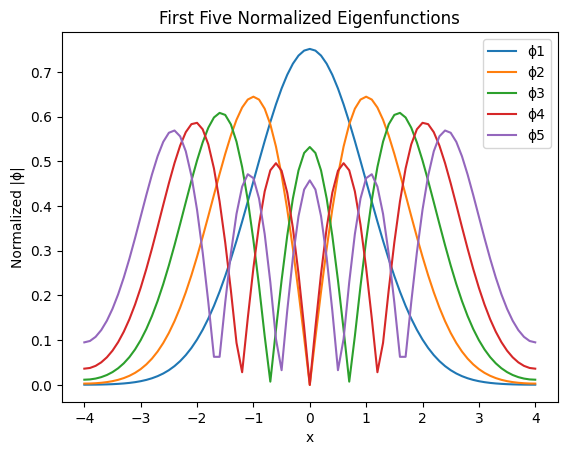

In [11]:
# Part B
L = 4
dx = 0.1
xspan = np.arange(-L, L + dx, dx)
N = len(xspan) - 2  # Number of interior points

# matrix A
A = np.zeros((N, N))

for j in range(0, N - 1):
    A[j, j + 1] = 1
    A[j+1, j] = 1

for j in range(0, N):
    A[j, j] = -2 - xspan[j + 1]**2 * (dx ** 2)

# Adjusting matrix for boundary conditions (A2)
A22 = np.zeros((N, N))
A22[0, 0] = 4 / 3
A22[0, 1] = -1 / 3
A22[-1, -1] = 4 / 3
A22[-1, -2] = -1 / 3

# Combine A and A2
A = A + A22

# Calculate eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eigs(-A,k=5, which='SM')

# Scale the first five eigenvalues
eigenvalues_final = np.sort(eigenvalues[:5]) / dx**2

# Calculate boundary values for eigenfunctions
eigenfunctions_0 = 4 / 3 * eigenfunctions[0, :] - 1 / 3 * eigenfunctions[1, :]
eigenfunctions_N1 = 4 / 3 * eigenfunctions[-1, :] - 1 / 3 * eigenfunctions[-2, :]

# Insert boundary values
eigenfunctions_final = np.vstack([eigenfunctions_0, eigenfunctions, eigenfunctions_N1])

# Normalize
for i in range(5):
    norm = np.trapz(eigenfunctions_final[:, i] ** 2, xspan)
    normalized_phi = eigenfunctions_final[:, i] / np.sqrt(norm)
    eigenfunctions_final[:,i] = np.abs(normalized_phi)


# Plot the first five normalized eigenfunctions
for i in range(5):
    plt.plot(xspan, eigenfunctions_final[:, i], label=f'ϕ{i+1}')

A3 = eigenfunctions_final
A4 = eigenvalues_final[:5]

plt.xlabel('x')
plt.ylabel('Normalized |ϕ|')
plt.legend()
plt.title('First Five Normalized Eigenfunctions')
#plt.show()

# Output the eigenvalues
print("First five eigenvalues:", A4)
print("First five eigenfunctions:", A3)


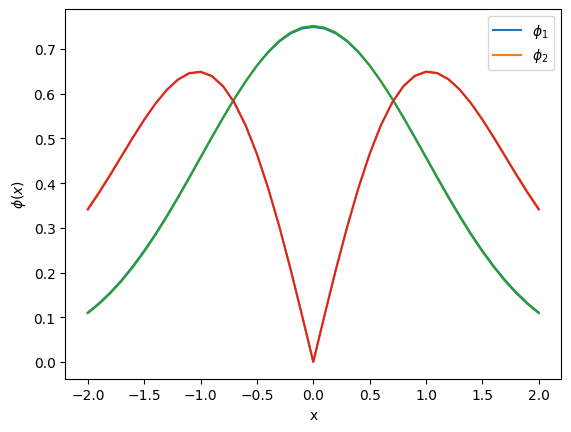

A6: [1.01294479 2.92140579]
A8: [0.97404232 2.89312038]


array([[1.10632409e-01, 3.42995690e-01],
       [1.31425462e-01, 3.80308074e-01],
       [1.55620753e-01, 4.20317453e-01],
       [1.83285258e-01, 4.61688104e-01],
       [2.14395042e-01, 5.02884050e-01],
       [2.48815431e-01, 5.42261430e-01],
       [2.86301009e-01, 5.78068498e-01],
       [3.26495620e-01, 6.08445624e-01],
       [3.69025039e-01, 6.31547416e-01],
       [4.13247307e-01, 6.45554804e-01],
       [4.58248989e-01, 6.48573774e-01],
       [5.03110861e-01, 6.39163813e-01],
       [5.46908789e-01, 6.16356069e-01],
       [5.88713732e-01, 5.79653346e-01],
       [6.27591743e-01, 5.29030111e-01],
       [6.62603966e-01, 4.64984942e-01],
       [6.92806637e-01, 3.88673667e-01],
       [7.17251083e-01, 3.01714808e-01],
       [7.35086018e-01, 2.06172945e-01],
       [7.45920149e-01, 1.04560118e-01],
       [7.49523414e-01, 1.64173226e-04],
       [7.45833727e-01, 1.04716924e-01],
       [7.34963344e-01, 2.06225026e-01],
       [7.17198864e-01, 3.01773361e-01],
       [6.930012

In [3]:
# Part C
# Differential equation for shooting method
def shoot_eq(x, phi, epsilon, gamma):
    return [phi[1], (gamma * phi[0] ** 2 + x**2 - epsilon) * phi[0]]

# Adjust epsilon until boundary condition is met
def adjust_epsilon(A, epsilon, gamma, modes, tol, xspan, phi0):
    depsilon = 0.2  # Step size for epsilon adjustment
    for _ in range(100):  # Maximum iterations
        # Solve the differential equation
        sol_ivp = solve_ivp(lambda x, phi: shoot_eq(x, phi, epsilon, gamma),
                            [xspan[0], xspan[-1]], phi0, t_eval=xspan)
        sol = sol_ivp.y.T
        bc = sol[-1, 1] + np.sqrt(L**2 - epsilon) * sol[-1, 0]

        # Check if boundary condition is within tolerance
        if abs(bc) < tol:
            return epsilon, sol

        # Adjust epsilon directionally based on modes
        if (-1) ** (modes + 1) * bc > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon
            depsilon /= 2  # Reduce step size for accuracy

    raise ValueError("Epsilon adjustment did not converge.")

# Adjust amplitude A to normalize solution
def adjust_amplitude(A, epsilon, gamma, modes, tol, xspan):
    dA = 0.01  # Step size for amplitude adjustment
    for _ in range(100):  # Maximum iterations
        phi0 = [A, np.sqrt(L**2 - epsilon) * A]
        epsilon, sol = adjust_epsilon(A, epsilon, gamma, modes, tol, xspan, phi0)

        # Compute integral to check normalization
        integral = np.trapz(sol[:, 0]**2, x=xspan)
        if abs(integral - 1) < tol:
            return A, epsilon, sol

        # Adjust amplitude A directionally
        if integral < 1:
            A += dA
        else:
            A -= dA
            dA /= 2  # Reduce step size for accuracy

    raise ValueError("Amplitude adjustment did not converge.")

# Parameters
tol = 1e-6
L = 2
dx = 0.1
xspan = np.arange(-L, L + dx, dx)
gamma_values = [0.05, -0.05]

# Initialize storage for results
A5, A7 = np.zeros((len(xspan), 2)), np.zeros((len(xspan), 2))
A6, A8 = np.zeros(2), np.zeros(2)

# Main loop for each gamma value
for idx, gamma in enumerate(gamma_values):
    epsilon0 = 0.1
    A = 1e-6

    for modes in range(1, 3):
        # Adjust amplitude and epsilon
        A, epsilon, sol = adjust_amplitude(A, epsilon0, gamma, modes, tol, xspan)

        # Store results in the appropriate arrays
        if gamma > 0:
            A5[:, modes - 1] = np.abs(sol[:, 0])
            A6[modes - 1] = epsilon
        else:
            A7[:, modes - 1] = np.abs(sol[:, 0])
            A8[modes - 1] = epsilon

        # Increment epsilon0 for next mode
        epsilon0 = epsilon + 0.2

# Plot the results
plt.plot(xspan, A5, label="A5 (gamma=0.05)")
plt.plot(xspan, A7, label="A7 (gamma=-0.05)")
plt.legend(["$\\phi_1$", "$\\phi_2$"], loc="upper right")
plt.xlabel("x")
plt.ylabel("$\\phi(x)$")
plt.show()

# Print results
print("A6:", A6)
print("A8:", A8)
A5

In [4]:
# Part D
# Define the differential equation system
def hwl_rhs_a(x, phi, epsilon):
    return [phi[1], (x ** 2 - epsilon) * phi[0]]

# Function to solve ODE with a specific method and tolerance
def solve_with_method(method, x_span, phi0, epsilon, tol):
    options = {'rtol': tol, 'atol': tol}
    sol = solve_ivp(hwl_rhs_a, x_span, phi0, method=method, args=(epsilon,), **options)
    return np.mean(np.diff(sol.t))

# Main parameters
L = 2
x_span = [-L, L]
epsilon = 1
A = 1
phi0 = [A, np.sqrt(L ** 2 - epsilon) * A]
tols = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# ODE solver methods
methods = ['RK45', 'RK23', 'Radau', 'BDF']
average_timesteps = {method: [] for method in methods}

# Calculate average time steps
for tol in tols:
    for method in methods:
        avg_dt = solve_with_method(method, x_span, phi0, epsilon, tol)
        average_timesteps[method].append(avg_dt)

# Perform linear regression
slopes = [
    np.polyfit(np.log(average_timesteps[method]), np.log(tols), 1)[0]
    for method in methods
]

A9 = np.array(slopes)

In [33]:
# Part E
# Define the Gauss-Hermite polynomial function
def gauss_hermite_poly(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 2 * x
    elif n == 2:
        return 4 * x**2 - 2
    elif n == 3:
        return 8 * x**3 - 12 * x
    elif n == 4:
        return 16 * x**4 - 48 * x**2 + 12

# Normalize Gauss-Hermite functions
def normalized_gauss_hermite(n, x):
    h_n = gauss_hermite_poly(n, x)
    norm_factor = np.sqrt(math.factorial(n) * (2**n) * np.sqrt(np.pi))
    return (np.exp(-x**2 / 2) * h_n) / norm_factor

# Define x range and step size
L = 4
dx = 0.1
x_values = np.arange(-L, L + dx, dx)

# Create a matrix for the Gauss-Hermite polynomial values
poly_matrix = np.column_stack([gauss_hermite_poly(n, x_values) for n in range(5)])

# Create a matrix for normalized Gauss-Hermite functions
norm_func_matrix = np.column_stack([normalized_gauss_hermite(n, x_values) for n in range(5)])

# Calculate integration using a simple trapezoidal rule
def trapezoidal_integration(y, dx):
    return np.sum((y[:-1] + y[1:]) / 2) * dx

# Initialize arrays to hold errors
func_error_a = np.zeros(5)
func_error_b = np.zeros(5)
eigval_error_a = np.zeros(5)
eigval_error_b = np.zeros(5)

# Calculate function and eigenvalue errors
for n in range(5):
    # Calculate the function error between actual and normalized Gauss-Hermite functions
    diff_a = np.abs(A1[:, n]) - np.abs(norm_func_matrix[:, n])
    diff_b = np.abs(A3[:, n]) - np.abs(norm_func_matrix[:, n])
    func_error_a[n] = trapezoidal_integration(diff_a**2, dx)
    func_error_b[n] = trapezoidal_integration(diff_b**2, dx)

    # Calculate percentage eigenvalue errors
    target_eigval = 2 * (n + 1) - 1
    eigval_error_a[n] = 100 * np.abs(A2[n] - target_eigval) / target_eigval
    eigval_error_b[n] = 100 * np.abs(A4[n] - target_eigval) / target_eigval

# Output results
print("Function Error A:", func_error_a)
print("Eigenvalue Error A:", eigval_error_a)
print("Function Error B:", func_error_b)
print("Eigenvalue Error B:", eigval_error_b)

A10 = func_error_a
A11 = eigval_error_a
A12 = func_error_b
A13 = eigval_error_b

Function Error A: [4.57692773e-08 1.72430976e-07 2.47860414e-07 4.35413370e-07
 1.96490590e-06]
Eigenvalue Error A: [0.02642089 0.03324661 0.03073889 0.03455707 0.04161944]
Function Error B: [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
Eigenvalue Error B: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
